<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
from datetime import datetime

timestamp = pd.Timestamp(datetime(2025,1,1))

#### Timestamp, period and daterange

In [211]:
timestamp

Timestamp('2025-01-01 00:00:00')

In [212]:
timestamp.year, timestamp.month, timestamp.day_name()

(2025, 1, 'Wednesday')

In [213]:
period = pd.Period('2025-01')
period

Period('2025-01', 'M')

In [214]:
period.asfreq('D')

Period('2025-01-31', 'D')

In [215]:
period + 1

Period('2025-02', 'M')

In [216]:
index = pd.date_range('2025-01-01', '2025-01-07')
index

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07'],
              dtype='datetime64[ns]', freq='D')

In [217]:
index = pd.date_range('2025-01-01', periods=12, freq='ME')
for i in index:
  print (i)

2025-01-31 00:00:00
2025-02-28 00:00:00
2025-03-31 00:00:00
2025-04-30 00:00:00
2025-05-31 00:00:00
2025-06-30 00:00:00
2025-07-31 00:00:00
2025-08-31 00:00:00
2025-09-30 00:00:00
2025-10-31 00:00:00
2025-11-30 00:00:00
2025-12-31 00:00:00


In [218]:
pd.DataFrame(index)

,0
0,2025-01-31
1,2025-02-28
2,2025-03-31
3,2025-04-30
4,2025-05-31
5,2025-06-30
6,2025-07-31
7,2025-08-31
8,2025-09-30
9,2025-10-31


#### Indexing

In [219]:
import kagglehub

path = kagglehub.dataset_download("shenba/time-series-datasets")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'time-series-datasets' dataset.
Path to dataset files: /kaggle/input/time-series-datasets


In [220]:
!ls -lart /root/.cache/kagglehub/datasets/shenba/time-series-datasets/versions/1

total 84
drwxr-xr-x 3 root root  4096 Sep 17 02:04 ..
-rw-r--r-- 1 root root  7318 Sep 17 02:04 Electric_Production.csv
-rw-r--r-- 1 root root   509 Sep 17 02:04 sales-of-shampoo-over-a-three-ye.csv
-rw-r--r-- 1 root root  6903 Sep 17 02:04 monthly-beer-production-in-austr.csv
-rw-r--r-- 1 root root 55852 Sep 17 02:04 daily-minimum-temperatures-in-me.csv
drwxr-xr-x 2 root root  4096 Sep 17 02:04 .


In [221]:
daily_temp = pd.read_csv(path + '/daily-minimum-temperatures-in-me.csv')

In [222]:
daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [223]:
daily_temp.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [224]:
daily_temp['Date'] = pd.to_datetime(daily_temp['Date'])

In [225]:
daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


In [226]:
daily_temp.set_index('Date', inplace=True)

In [227]:
daily_temp.loc['1981']

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1981-12-27,15.5
1981-12-28,13.3
1981-12-29,15.6


In [228]:
daily_temp.loc['1981'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1981-01-01 to 1981-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Daily minimum temperatures  365 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


<Axes: xlabel='Date'>

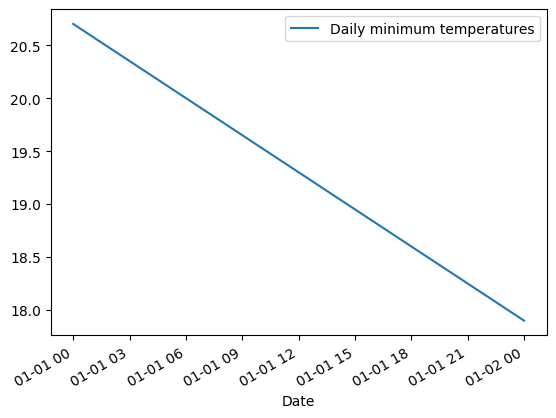

In [229]:
daily_temp['Daily minimum temperatures'] = pd.to_numeric(daily_temp['Daily minimum temperatures'], errors='coerce')
daily_temp['1981-01-01': '1981-01-02'].plot()

In [230]:
daily_temp.asfreq('h').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87625 entries, 1981-01-01 00:00:00 to 1990-12-31 00:00:00
Freq: h
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 1.3 MB


In [231]:
daily_temp.asfreq('h')['1981-01-01': '1981-01-01'].head()

,Daily minimum temperatures
Date,
1981-01-01 00:00:00,20.7
1981-01-01 01:00:00,NaN
1981-01-01 02:00:00,NaN
1981-01-01 03:00:00,NaN
1981-01-01 04:00:00,NaN


array([<Axes: xlabel='Date'>], dtype=object)

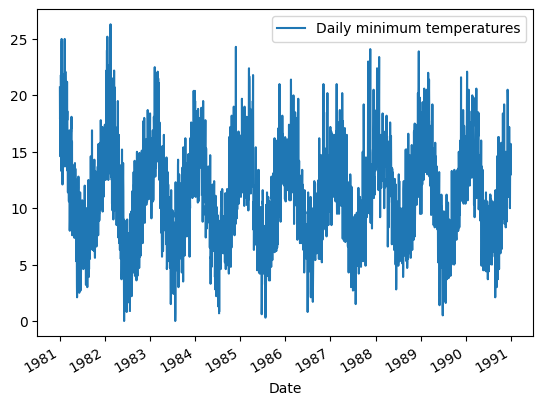

In [232]:
daily_temp.plot(subplots=True)

#### Shifting series

In [233]:
daily_temp.shift(1).head()

,Daily minimum temperatures
Date,
1981-01-01,NaN
1981-01-02,20.7
1981-01-03,17.9
1981-01-04,18.8
1981-01-05,14.6


In [234]:
daily_temp.shift(-1).head()

,Daily minimum temperatures
Date,
1981-01-01,17.9
1981-01-02,18.8
1981-01-03,14.6
1981-01-04,15.8
1981-01-05,15.8


In [235]:
daily_temp['Daily minimum temperatures'].div(daily_temp['Daily minimum temperatures'].shift(1))

,Daily minimum temperatures
Date,
1981-01-01,NaN
1981-01-02,0.864734
1981-01-03,1.050279
1981-01-04,0.776596
1981-01-05,1.082192
...,...
1990-12-27,0.958904
1990-12-28,0.971429
1990-12-29,0.992647


<Axes: xlabel='Date'>

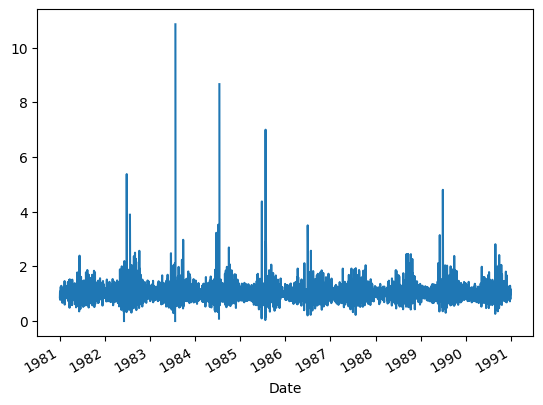

In [236]:
daily_temp['Daily minimum temperatures'].div(daily_temp['Daily minimum temperatures'].shift(1)).plot()

In [237]:
daily_temp['diff'] = daily_temp['Daily minimum temperatures'].diff()

In [238]:
daily_temp['percent_diff'] = daily_temp['Daily minimum temperatures'].pct_change(fill_method=None)

In [239]:
daily_temp.head()

,Daily minimum temperatures,diff,percent_diff
Date,,,
1981-01-01,20.7,NaN,NaN
1981-01-02,17.9,-2.8,-0.135266
1981-01-03,18.8,0.9,0.050279
1981-01-04,14.6,-4.2,-0.223404
1981-01-05,15.8,1.2,0.082192


In [240]:
daily_temp = pd.read_csv(path + '/daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], index_col='Date')
daily_temp['Daily minimum temperatures'] = pd.to_numeric(daily_temp['Daily minimum temperatures'], errors='coerce')


In [241]:
daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


#### Resampling

<Axes: xlabel='Date'>

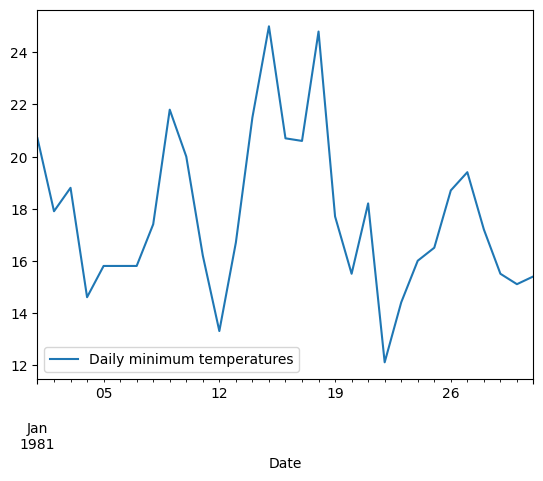

In [242]:
daily_temp.loc["1981-01"].plot()

<Axes: xlabel='Date'>

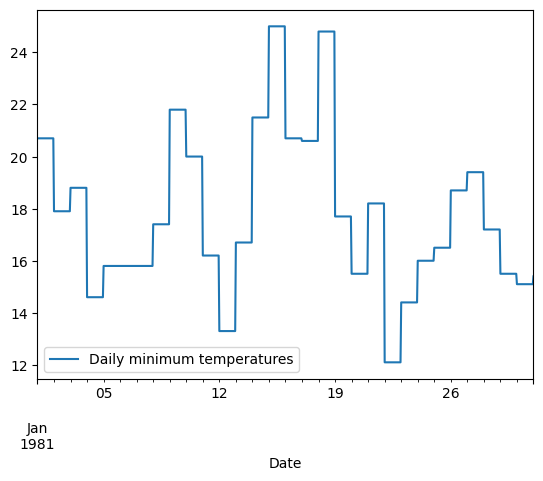

In [243]:
daily_temp.loc["1981-01"].asfreq('h', method='ffill').plot()

<Axes: xlabel='Date'>

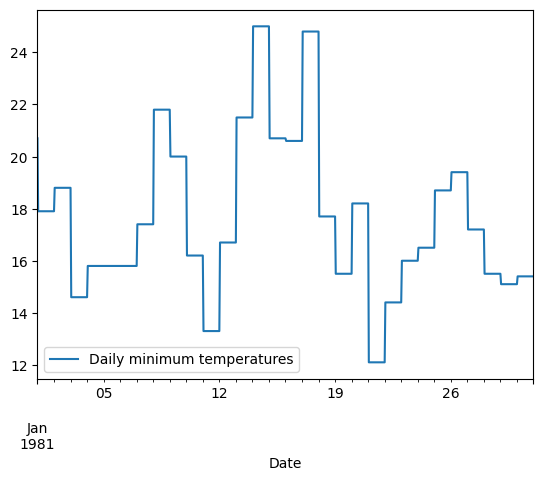

In [244]:
daily_temp.loc["1981-01"].asfreq('h', method='bfill').plot()

Daily minimum temperatures    15.3
Name: 1981-02-01 00:00:00, dtype: float64


<Axes: xlabel='Date'>

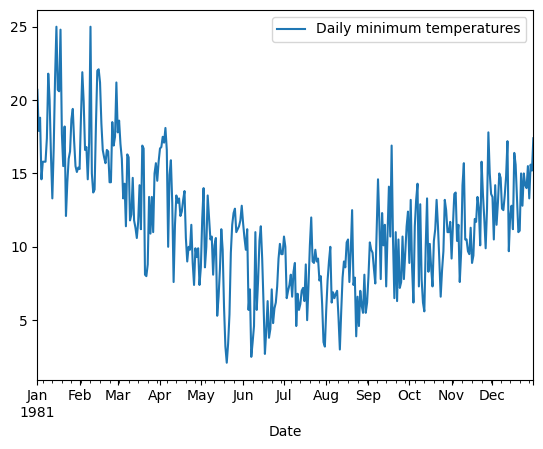

In [245]:
print (daily_temp.loc['1981-02-01'])
daily_temp.loc["1981"].plot()

<Axes: xlabel='Date'>

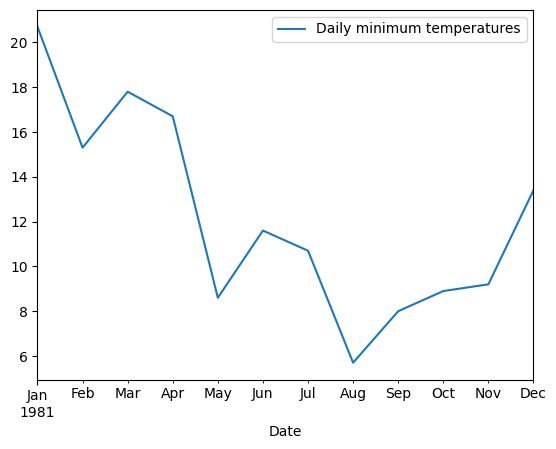

In [246]:
# resample with monthly values
daily_temp.loc["1981"].resample('MS').asfreq().plot()


<Axes: >

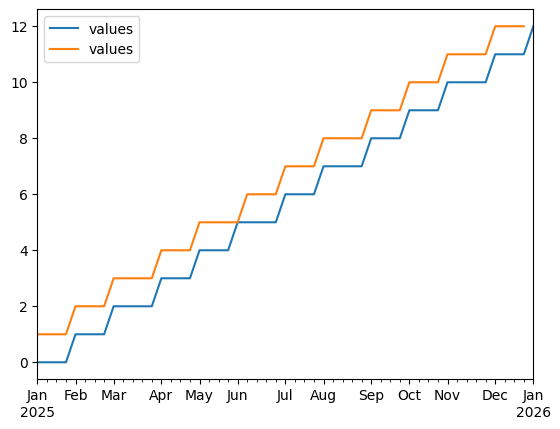

In [247]:
monthly = pd.date_range('2025-01-01', '2026-01-01', freq='MS')
values = list([i for i in range(13)])
monthly_df = pd.DataFrame(values, index=monthly, columns=['values'])
monthly_df_interpolate_weekly = monthly_df.asfreq('W', method='bfill').interpolate()
monthly_df = monthly_df.resample('W').ffill()
pd.concat([monthly_df, monthly_df_interpolate_weekly], axis=1).plot()

<Axes: xlabel='Date'>

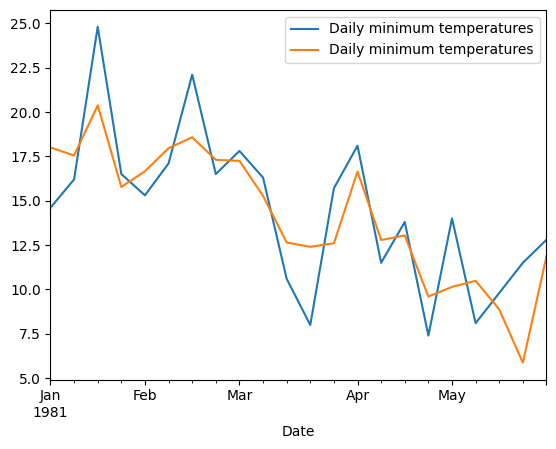

In [248]:
monthly_df = daily_temp.loc['1981-01':'1981-05'].resample('W').ffill()
monthly_df_mean = daily_temp.loc['1981-01':'1981-05'].resample('W').mean()

pd.concat([monthly_df, monthly_df_mean], axis=1).plot()

<Axes: xlabel='Date'>

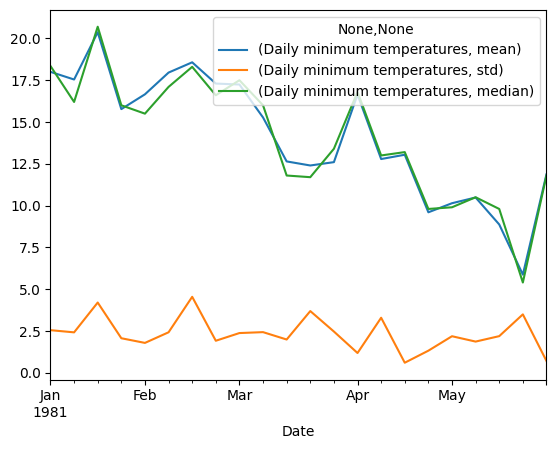

In [249]:
monthly_df_agg = daily_temp.loc['1981-01':'1981-05'].resample('W').agg(['mean', 'std', 'median'])
monthly_df_agg.plot()

#### Window functions

<Axes: xlabel='Date'>

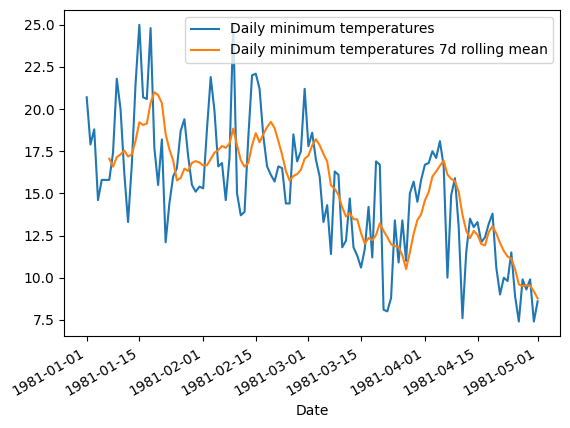

In [250]:
dt_year = daily_temp['1981-01-01': '1981-05-01']
pd.concat([dt_year, dt_year.rolling(7).mean().add_suffix(' 7d rolling mean')]).plot()

<Axes: xlabel='Date'>

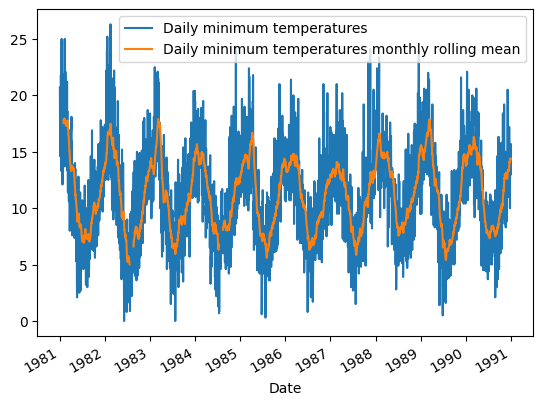

In [251]:
pd.concat([daily_temp, daily_temp.rolling(30).mean().add_suffix(' monthly rolling mean')]).plot()

<Axes: xlabel='Date'>

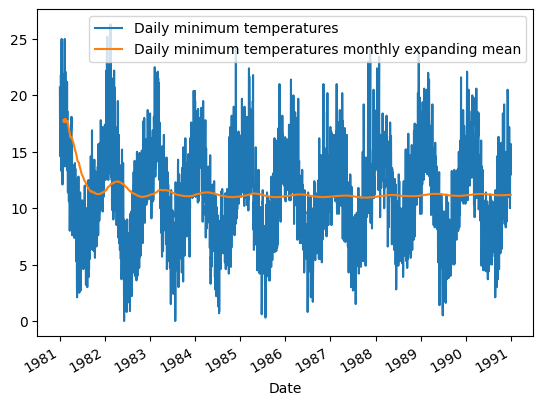

In [252]:
pd.concat([daily_temp, daily_temp.expanding(30).mean().add_suffix(' monthly expanding mean')]).plot()

<Axes: xlabel='Date'>

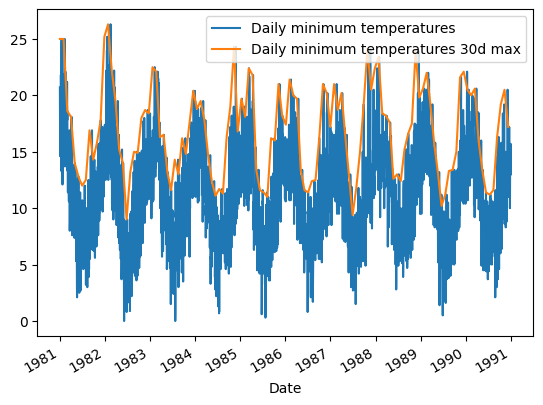

In [253]:
pd.concat([daily_temp, daily_temp.resample('30D').max().add_suffix(' 30d max')]).plot()

##### Expanding max

<Axes: xlabel='Date'>

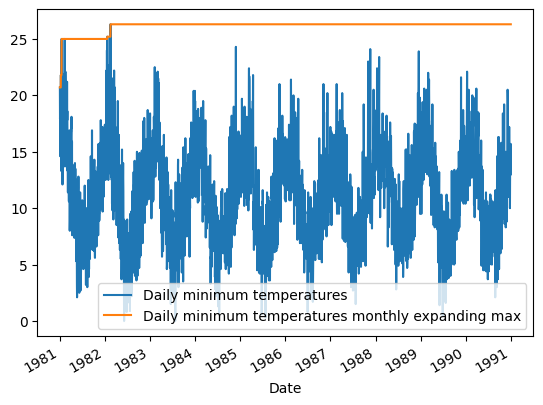

In [254]:
pd.concat([daily_temp, daily_temp.expanding().max().add_suffix(' monthly expanding max')]).plot()

<Axes: xlabel='Date'>

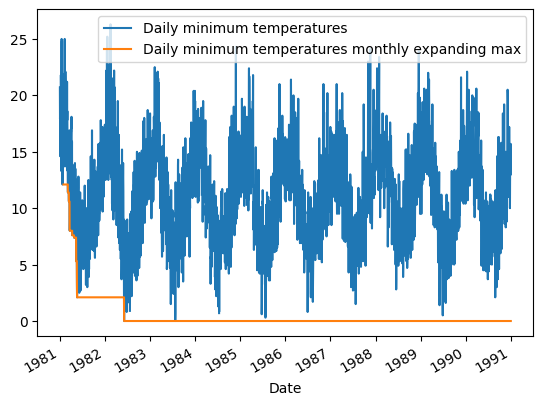

In [255]:
pd.concat([daily_temp, daily_temp.expanding(30).min().add_suffix(' monthly expanding max')]).plot()

<Axes: xlabel='Date'>

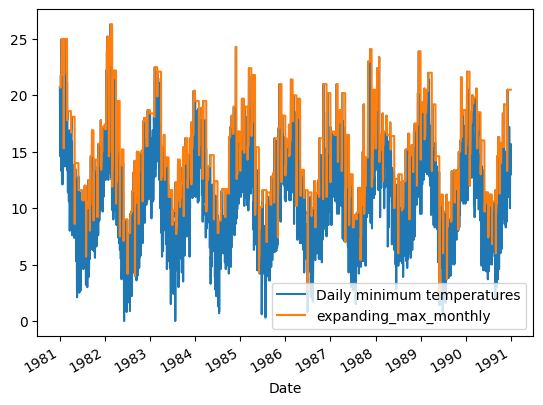

In [259]:
daily_temp['month'] = daily_temp.index.to_period('M')
expanding_max_monthly = daily_temp.groupby('month')['Daily minimum temperatures'].expanding().max().reset_index(level=0, drop=True)

daily_temp['expanding_max_monthly'] = expanding_max_monthly

pd.concat([daily_temp['Daily minimum temperatures'], daily_temp['expanding_max_monthly']], axis=1).plot()